In [1]:
import os, sys
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 
from IPython.core.display import display, HTML    
display(HTML("<style>.container {width:90% !important; }</style>"))
%matplotlib notebook 
np.set_printoptions(precision=5, suppress=True)

In [108]:
# PATHS
PCA_FILE ="/dors/capra_lab/users/abraha1/prelim_studies/katja_biobank/data/mega_data/covariates/inter_pca__merged_MEGA_2019-04-13.eigenvec"
FID_BATCH_FILE ="/dors/capra_lab/users/abraha1/prelim_studies/katja_biobank/data/mega_data/covariates/mega_fid_batch_list_2019-04-14.tsv"
FAM_FILE="/dors/capra_lab/users/abraha1/prelim_studies/katja_biobank/data/mega_data/merge_batches/merged_MEGA_2019-04-12.fam"
OUTPUT_DIR="/dors/capra_lab/users/abraha1/prelim_studies/katja_biobank/data/mega_data/batch_effects/pca_by_sex_batch"

In [7]:
pca = pd.read_csv(PCA_FILE, sep="\s+")
fam = pd.read_csv(FAM_FILE, sep="\s+", header=None, names=['FID','IID','WID_F','WID_M','SEX','PHENO'])
fid_batch = pd.read_csv(FID_BATCH_FILE, sep="\s+", header=None, names=['FID','BATCH'])

In [9]:
pca.head(2)
fam.head(2)
fid_batch.head(2)

,FID,IID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,R200002498,R200002498,-0.000804,-0.000266,0.004240,0.001063,-0.003366,0.001928,-0.002615,-0.001952,-0.007045,0.001740
1,R200004714,R200004714,0.000754,-0.002394,0.002227,-0.001921,0.004753,0.001200,0.008427,0.001031,0.000007,0.006067


,FID,IID,WID_F,WID_M,SEX,PHENO
0,R200002498,R200002498,0,0,2,2
1,R200004714,R200004714,0,0,1,1


,FID,BATCH
0,R200146053,MEGA_ex_Array_Batch10_Cox_14_GenderDysphoria9_...
1,R200328093,MEGA_ex_Array_Batch10_Cox_14_GenderDysphoria9_...


In [10]:
# merge tables 
sex_dict = dict(zip(fam.FID, fam.SEX))
batch_dict = dict(zip(fid_batch.FID, fid_batch.BATCH))

In [48]:
full_df = pca.copy()
full_df['sex']  = full_df.FID.map(sex_dict)
full_df['batch']  = full_df.FID.map(batch_dict)
full_df['sex'] = full_df.sex.apply(lambda x: 'male' if x ==1 else 'female')

In [49]:
full_df.head(2)

,FID,IID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,sex,batch
0,R200002498,R200002498,-0.000804,-0.000266,0.004240,0.001063,-0.003366,0.001928,-0.002615,-0.001952,-0.007045,0.001740,female,MEGA_ex_Array_Batch8_Cox_13_02_preQC_GRID
1,R200004714,R200004714,0.000754,-0.002394,0.002227,-0.001921,0.004753,0.001200,0.008427,0.001031,0.000007,0.006067,male,MEGA_ex_Array_Batch10_Cox_14_GenderDysphoria9_...


## Plot 

In [35]:
%load_ext rpy2.ipython

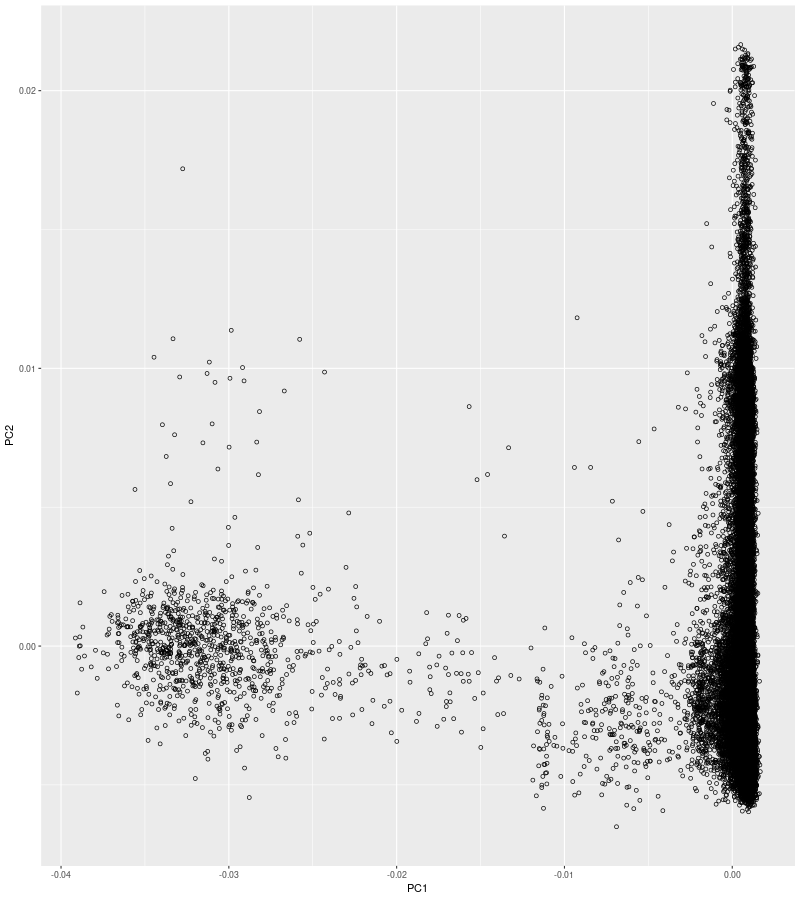

In [39]:
%%R -i full_df  -h 900 -w 800
### PLOT ALL DATA POINTS 
library(ggplot2)

ggplot(full_df, aes(x=PC1, y=PC2)) +
    geom_point(shape=1)      # Use hollow circles


In [86]:
sns.set( style='whitegrid',  font_scale=1.2, rc={'figure.figsize':(7,7)} )

No handles with labels found to put in legend.


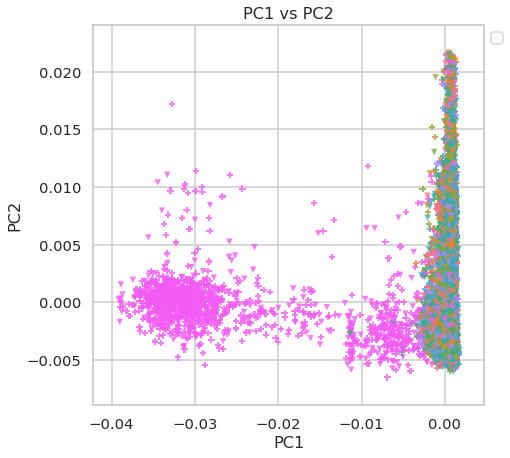

In [128]:
sns.set_context("talk", font_scale=0.9)
markers = {'male': "v", 'female': "P"}
_ = sns.scatterplot(x="PC1", y="PC2", data=full_df, hue="batch", style="sex",
               markers = markers, linewidth=0, alpha=0.8, size=40, legend=None)
_ = plt.legend(bbox_to_anchor=(1, 1), loc=2)
_ = plt.title('PC1 vs PC2')
# plt.savefig(os.path.join(OUTPUT_DIR, 'pc1_pc2_sex_and_batch.pdf'),bbox_inches='tight')

Text(0.5, 1.0, 'PC1 vs PC3')

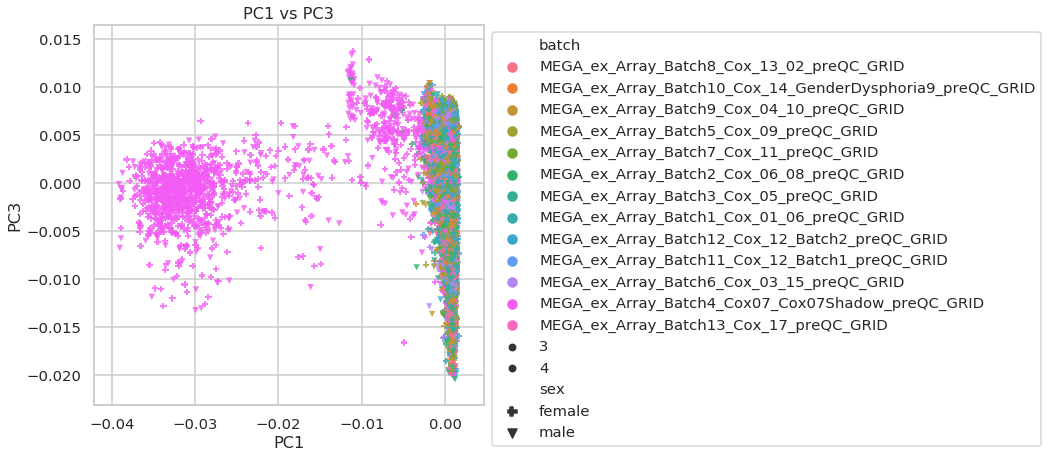

In [130]:
sns.set_context("talk", font_scale=0.9)
markers = {'male': "v", 'female': "P"}
_ = sns.scatterplot(x="PC1", y="PC3", data=full_df, hue="batch", style="sex",
               markers = markers, linewidth=0, alpha=0.8, size=4)
_ = plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title('PC1 vs PC3')
# plt.savefig(os.path.join(OUTPUT_DIR, 'pc1_pc3_sex_and_batch.pdf'),bbox_inches='tight')

Text(0.5, 1.0, 'PC1 vs PC4')

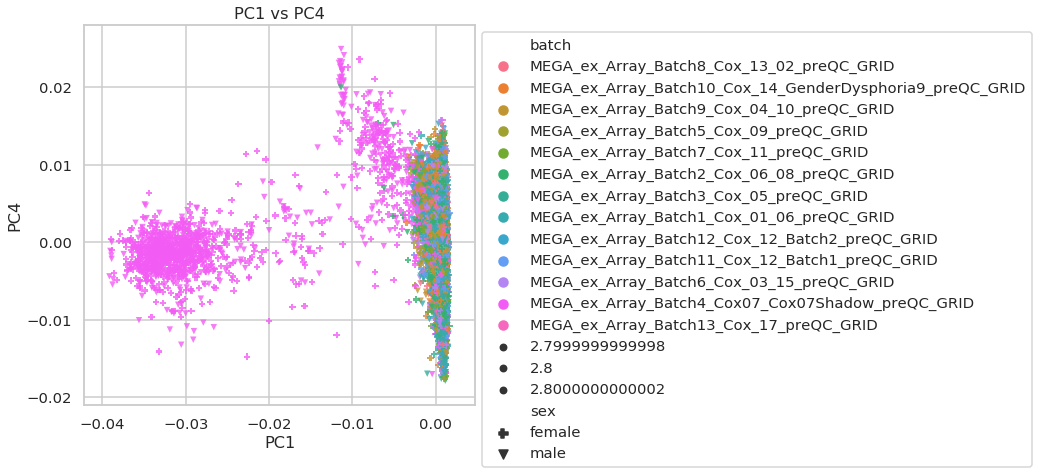

In [131]:
sns.set_context("talk", font_scale=0.9)
markers = {'male': "v", 'female': "P"}
_ = sns.scatterplot(x="PC1", y="PC4", data=full_df, hue="batch", style="sex",
               markers = markers, linewidth=0, alpha=0.8, size=2.8)
_ = plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title('PC1 vs PC4')
# plt.savefig(os.path.join(OUTPUT_DIR, 'pc1_pc4_sex_and_batch.pdf'),bbox_inches='tight')

Text(0.5, 1.0, 'PC1 vs PC5')

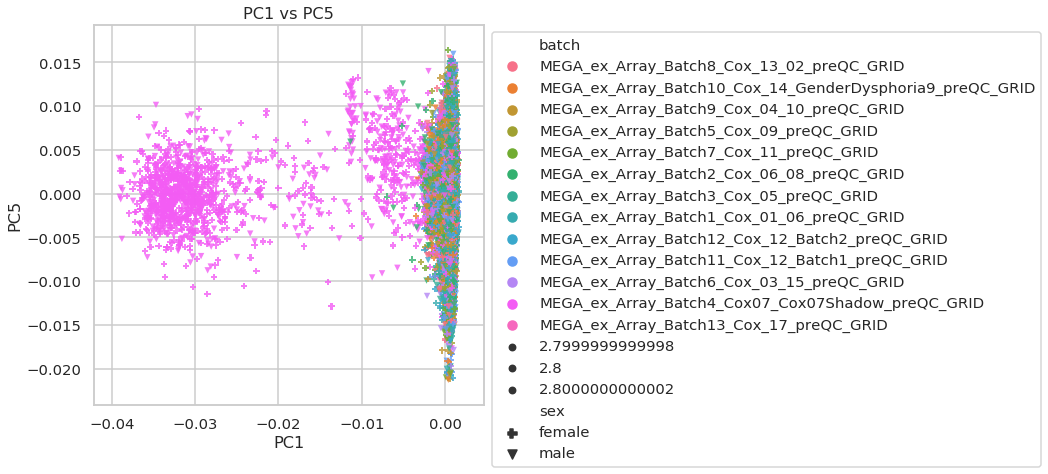

In [132]:
sns.set_context("talk", font_scale=0.9)
markers = {'male': "v", 'female': "P"}
_ = sns.scatterplot(x="PC1", y="PC5", data=full_df, hue="batch", style="sex",
               markers = markers, linewidth=0, alpha=0.8, size=2.8)
_ = plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title('PC1 vs PC5')
# plt.savefig(os.path.join(OUTPUT_DIR, 'pc1_pc5_sex_and_batch.pdf'),bbox_inches='tight')

Text(0.5, 1.0, 'PC2 vs PC3')

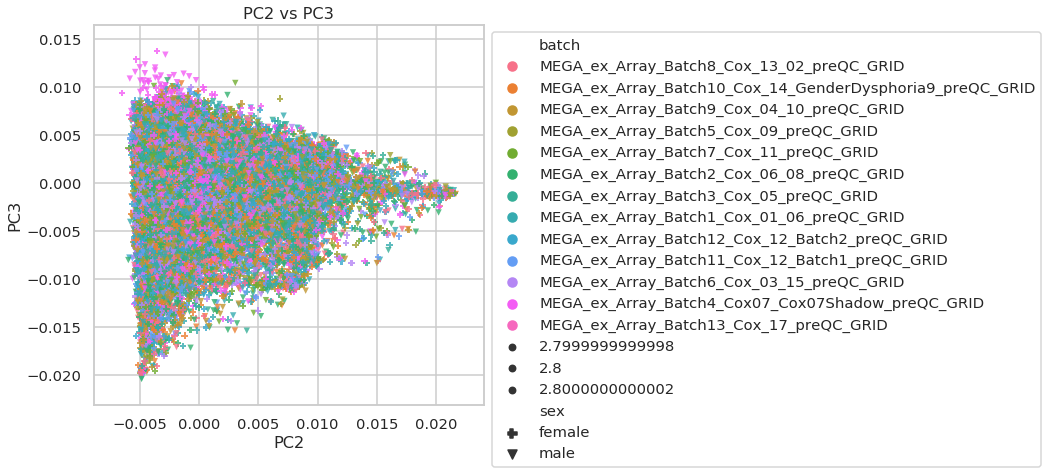

In [134]:
sns.set_context("talk", font_scale=0.9)
markers = {'male': "v", 'female': "P"}
_ = sns.scatterplot(x="PC2", y="PC3", data=full_df, hue="batch", style="sex",
               markers = markers, linewidth=0, alpha=0.8, size=2.8)
_ = plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title('PC2 vs PC3')
# plt.savefig(os.path.join(OUTPUT_DIR, 'pc2_pc3_sex_and_batch.pdf'),bbox_inches='tight')

Text(0.5, 1.0, 'PC2 vs PC4')

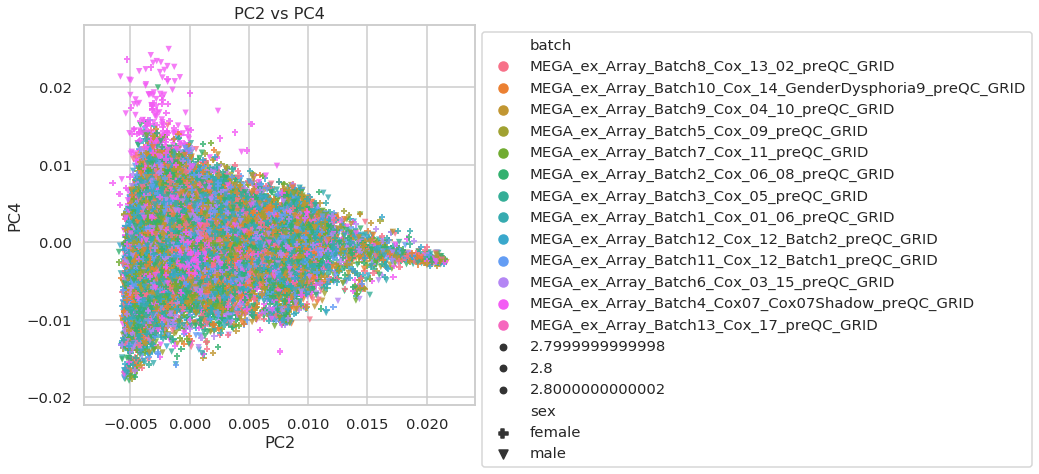

In [133]:
sns.set_context("talk", font_scale=0.9)
markers = {'male': "v", 'female': "P"}
_ = sns.scatterplot(x="PC2", y="PC4", data=full_df, hue="batch", style="sex",
               markers = markers, linewidth=0, alpha=0.8, size=2.8)
_ = plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title('PC2 vs PC4')
# plt.savefig(os.path.join(OUTPUT_DIR, 'pc2_pc4_sex_and_batch.pdf'),bbox_inches='tight')

Text(0.5, 1.0, 'PC2 vs PC5')

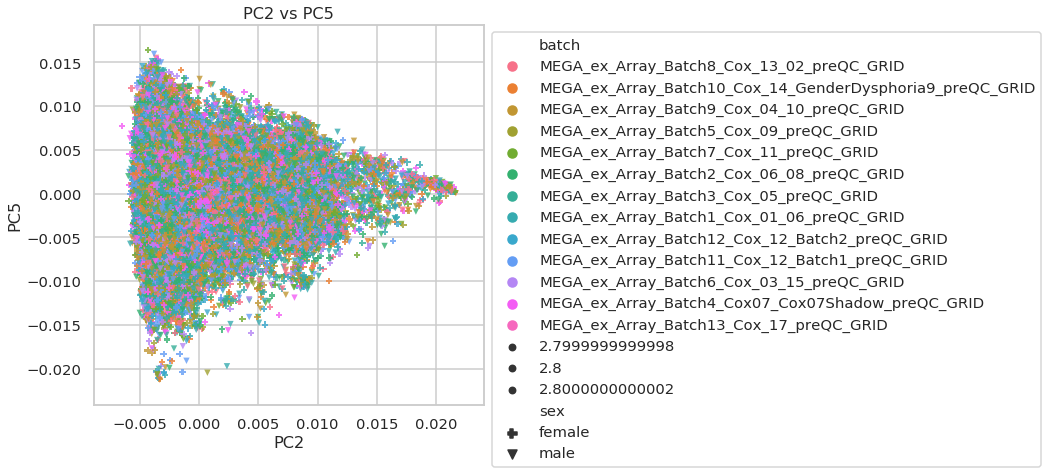

In [135]:
sns.set_context("talk", font_scale=0.9)
markers = {'male': "v", 'female': "P"}
_ = sns.scatterplot(x="PC2", y="PC5", data=full_df, hue="batch", style="sex",
               markers = markers, linewidth=0, alpha=0.8, size=2.8)
_ = plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title('PC2 vs PC5')
# plt.savefig(os.path.join(OUTPUT_DIR, 'pc2_pc5_sex_and_batch.pdf'),bbox_inches='tight')

Text(0.5, 1.0, 'PC3 vs PC4')

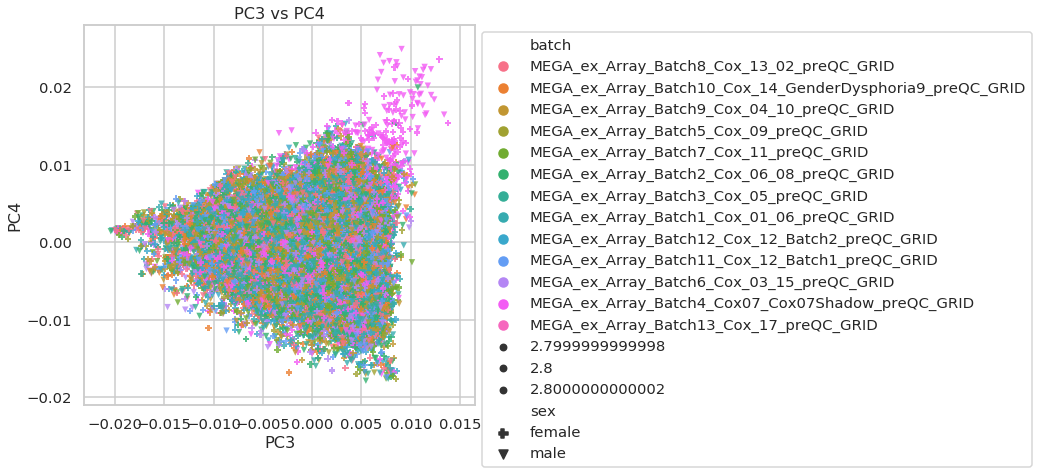

In [136]:
sns.set_context("talk", font_scale=0.9)
markers = {'male': "v", 'female': "P"}
_ = sns.scatterplot(x="PC3", y="PC4", data=full_df, hue="batch", style="sex",
               markers = markers, linewidth=0, alpha=0.8, size=2.8)
_ = plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title('PC3 vs PC4')
# plt.savefig(os.path.join(OUTPUT_DIR, 'pc3_pc4_sex_and_batch.pdf'),bbox_inches='tight')

Text(0.5, 1.0, 'PC4 vs PC5')

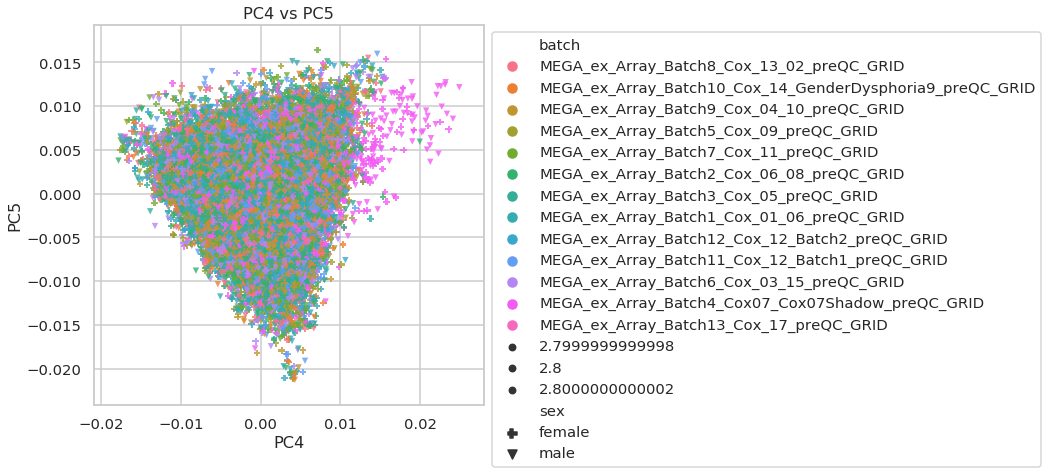

In [137]:
sns.set_context("talk", font_scale=0.9)
markers = {'male': "v", 'female': "P"}
_ = sns.scatterplot(x="PC4", y="PC5", data=full_df, hue="batch", style="sex",
               markers = markers, linewidth=0, alpha=0.8, size=2.8)
_ = plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title('PC4 vs PC5')
# plt.savefig(os.path.join(OUTPUT_DIR, 'pc4_pc5_sex_and_batch.pdf'),bbox_inches='tight')